In [1]:
# 1. IMPORTATION DES BIBLIOTHÈQUES NÉCESSAIRES
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

#### Prétraitement

In [2]:
# 1. Chargement sous forme de tableau (Dataframe) pour le nettoyage
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# 2. Vérification des valeurs manquantes
print("Valeurs manquantes par colonne :\n", df.isnull().sum())

# 3. Vérification des doublons
print(f"\nNombre de doublons avant : {df.duplicated().sum()}")
df = df.drop_duplicates() # On nettoie !

# 4. Séparation Features (X) et Cible (y)
X = df.drop('target', axis=1)
y = df['target']

# 5. Découpage final
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Valeurs manquantes par colonne :
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

Nombre de doublons avant : 1


#### Mise en place du modèle

In [4]:
modele_cart = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

In [5]:
# L'entraînement 
modele_cart.fit(X_train, y_train)

print("\n Modèle entraîné avec succès !")


 Modèle entraîné avec succès !


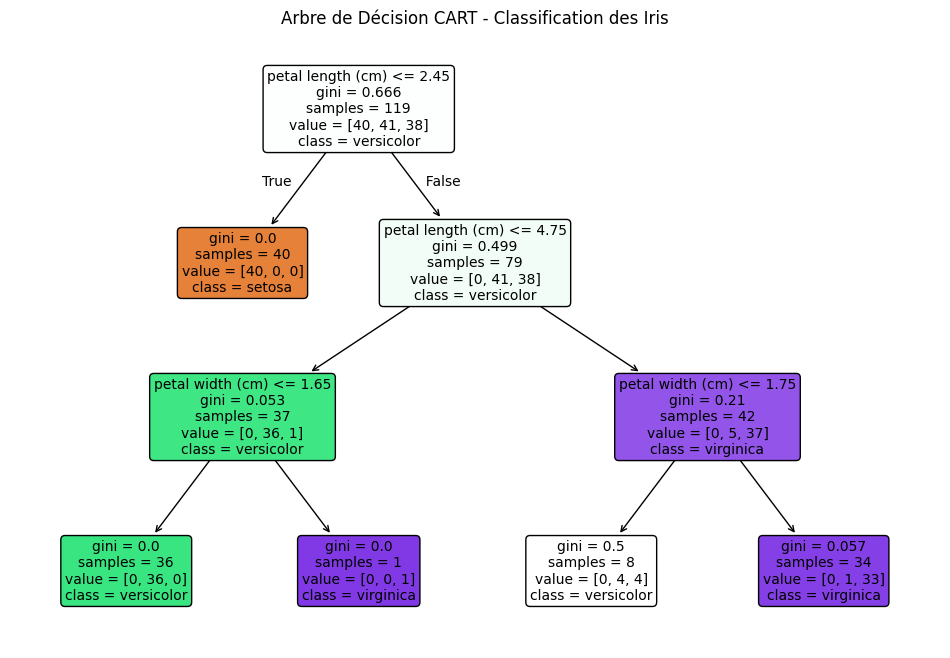

In [6]:
# VISUALISATION DE L'ARBRE
plt.figure(figsize=(12, 8))
plot_tree(modele_cart, 
          filled=True,              
          feature_names=data.feature_names, 
          class_names=list(data.target_names), 
          rounded=True,             
          fontsize=10)

plt.title("Arbre de Décision CART - Classification des Iris")
plt.show()

#### Evaluation des performances

In [7]:
# On demande au modèle de prédire la classe des 30 fleurs du jeu de test
y_pred = modele_cart.predict(X_test)

# Calcul de la précision (Accuracy)
precision = accuracy_score(y_test, y_pred)
print(f"\nPrécision du modèle : {precision * 100:.2f}%")

# Matrice de confusion 
matrice = confusion_matrix(y_test, y_pred)
print("\nMatrice de Confusion :")
print(matrice)


Précision du modèle : 100.00%

Matrice de Confusion :
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
